<a href="https://colab.research.google.com/github/LowProgrammer/workplace_aigorim/blob/master/tensorflow_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.13.1
(28, 28)


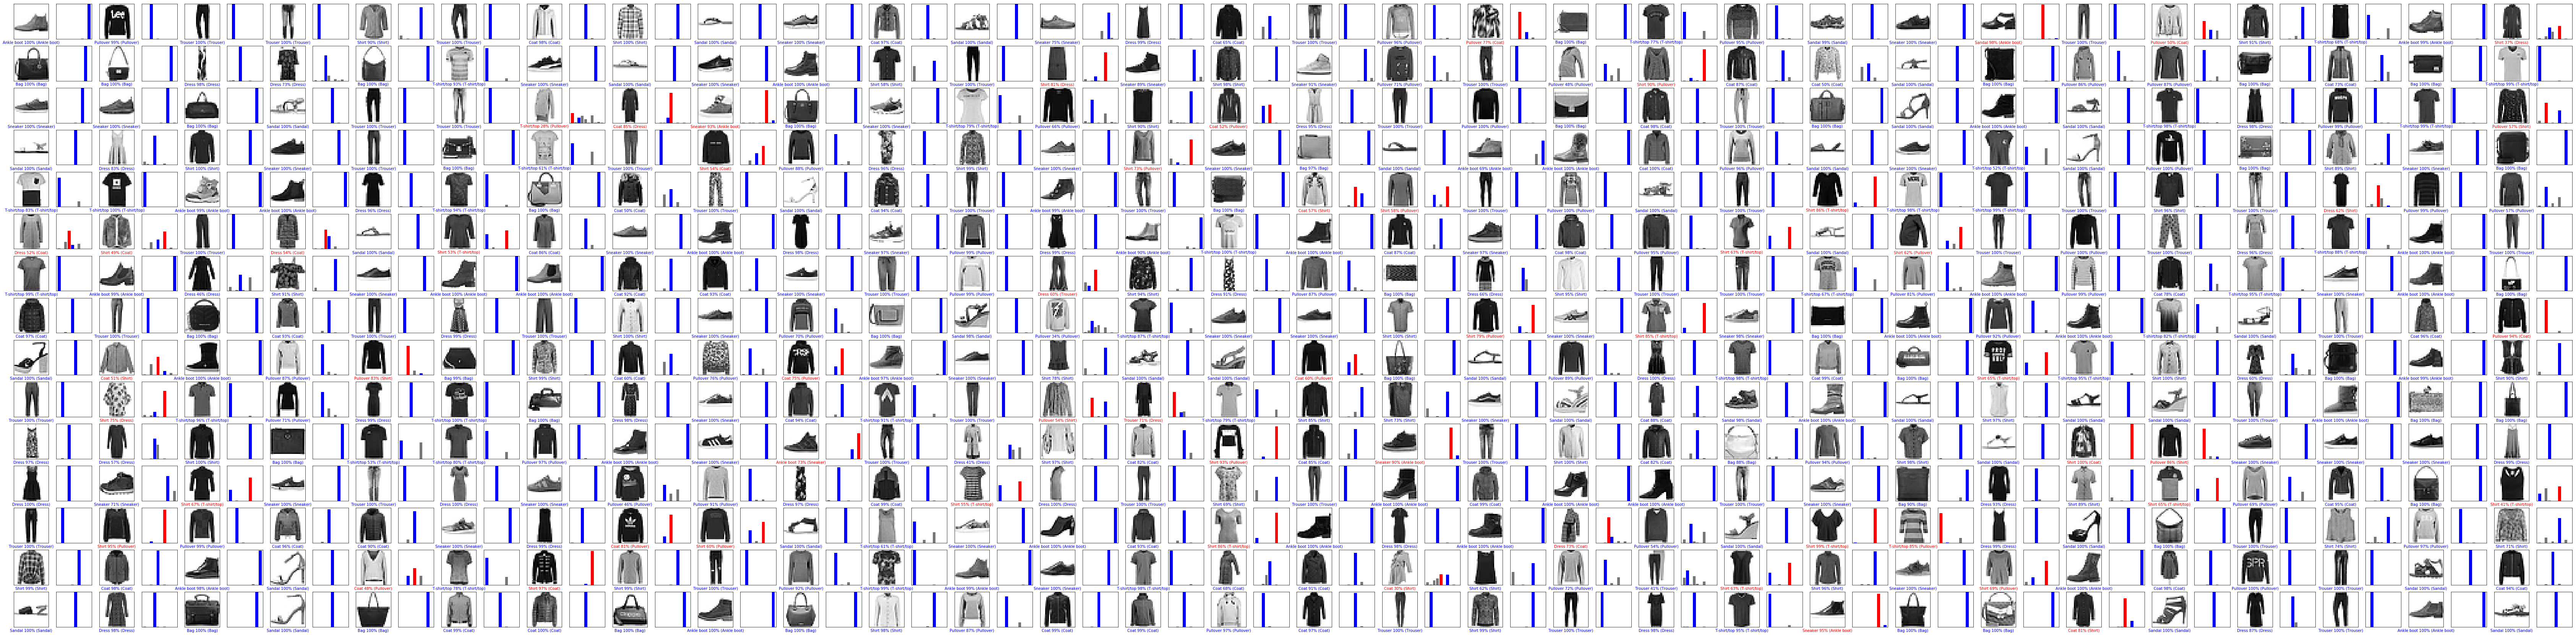

In [0]:
import tensorflow as tf

from tensorflow import  keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# 服饰图像分类模型
fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# train_images
# train_labels
#test_images
#test_labels

# class_names = ['T恤', '裤子', '套衫', '裙子', '外套','凉鞋', '衬衫', '运动鞋', '包包', '踝靴']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# train_images.shape
# len(train_images)

# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)

# 把值缩小为0-1之间
train_images=train_images/255.0
test_images=test_images/255.0


plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  
# 模型
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


# train
model.fit(train_images,train_labels,epochs=10)

test_loss,test_acc=model.evaluate(test_images,test_labels)

print('test accuracy:',test_acc)

# 预测
predictions=model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
# i = 0
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions, test_labels, test_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions,  test_labels)

# i = 12
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions, test_labels, test_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions,  test_labels)

num_rows = 15
num_cols = 30
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

  
img = test_images[0]

print(img.shape)